**Import the model building Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/

/content/drive/MyDrive
























**loading dataset**

In [ ]:
data = pd.read_excel("Crude Oil Prices Daily.xlsx")
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [ ]:
data

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
8218,2018-07-03,74.19
8219,2018-07-04,NaN
8220,2018-07-05,73.05
8221,2018-07-06,73.78


In [ ]:
data.isnull().sum()


Date             0
Closing Value    7
dtype: int64

In [ ]:
data.dropna(axis=0,inplace=True)


In [ ]:
data.isnull().sum()



Date             0
Closing Value    0
dtype: int64

In [ ]:
data_oil=data.reset_index()['Closing Value']
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [ ]:
data_oil

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

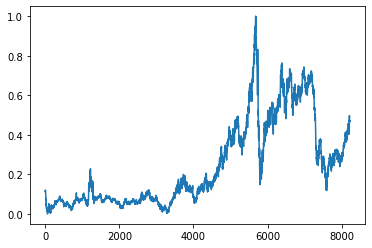

In [ ]:
plt.plot(data_oil)

In [ ]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [ ]:
training_size,test_size


(5340, 2876)

In [ ]:
train_data.shape

(5340, 1)

In [ ]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [ ]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [ ]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [ ]:
print(x_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [ ]:
x_train[0]

array([0.11335703, 0.11661484, 0.12053902, 0.11550422, 0.1156523 ,
       0.11683696, 0.1140234 , 0.10980305, 0.1089886 , 0.11054346])

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

**Adding LSTM Layers**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()

In [ ]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [ ]:
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


**Configure the Learning Process**

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam')

**Train The Model**

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64,verbose=1)

Epoch 1/3
84/84 [==============================] - 10s 43ms/step - loss: 0.0019 - val_loss: 8.5694e-04
Epoch 2/3
84/84 [==============================] - 2s 28ms/step - loss: 1.2829e-04 - val_loss: 7.8761e-04
Epoch 3/3
84/84 [==============================] - 2s 27ms/step - loss: 1.2445e-04 - val_loss: 8.0015e-04


**Model Evaluation**

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)
### Calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

**Save the Model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("crude_oil.hs")


**Test The Model**

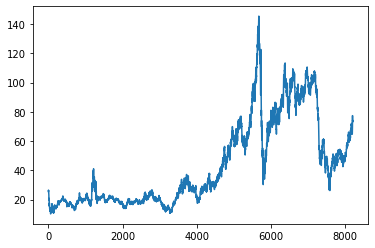

In [ ]:
### Plotting
look_back=10
trainpredictPlot = np.empty_like(data_oil)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictplot = np.empty_like(data_oil)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.show()

In [ ]:
len(test_data)

2876

In [ ]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [ ]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
#print(temp_input)
       x_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) #print(x_input)
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] #print(temp_input)
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.47481644]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47481644]
1 day output [[0.47913018]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47481644 0.47913018]
2 day output [[0.47777694]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47481644 0.47913018 0.47777694]
3 day output [[0.47426277]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47481644 0.47913018 0.47777694 0.47426277]
4 day output [[0.47512653]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47481644
 0.47913018 0.47777694 0.47426277 0.47512653]
5 day output [[0.4753611]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47481644 0.47913018
 0.47777694 0.47426277 0.47512653 0.47536111]
6 day output [[0.4759314]]
7 day input [0.46497853 0.47038353 0.47149415 0.47481644 0.47913018 

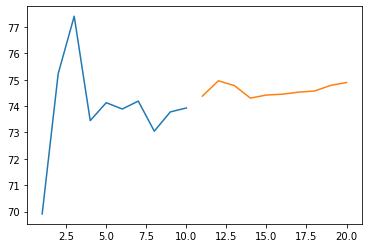

In [ ]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)
len(data_oil)
plt.plot(day_new, scaler.inverse_transform(data_oil[8206:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))

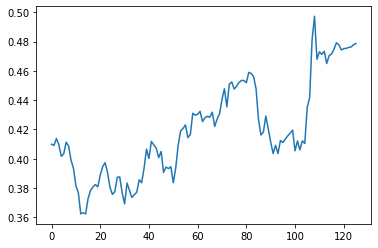

In [ ]:
df3=data_oil.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

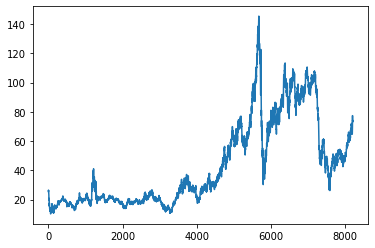

In [ ]:
plt.plot(scaler.inverse_transform(data_oil))

In [ ]:
!pip install ibm-watson-machine-learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.2 MB/s 
     |████████████████████████████████| 51 kB 639 kB/s 
     |████████████████████████████████| 824 kB 50.4 MB/s 
     |████████████████████████████████| 133 kB 59.0 MB/s 
     |████████████████████████████████| 547 kB 53.6 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=9822d82a2b99e91afeb0abcef22a54f207da0771f111761b59416fe3d221b46c
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=f146910532524452d48a306d14d19aff50c57bfdb91c2b5ea6bacda8b5c794b9
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 7.4 MB/s 
     |████████████████████████████████| 132 kB 39.4 MB/s 
     |████████████████████████████████| 9.9 MB 34.8 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 140 kB 41.6 MB/s 
     |████████████████████████████████| 127 kB 37.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:

wml_credentials ={
    "url":"https://us-south.ml.cloud.ibm.com" ,
    "apikey":"CriYm-QPxvLH7iMcTRj2wL2ddnQpi8_iCJFxcsiFUKvx"
}

from ibm_watson_machine_learning import APIClient
client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client

In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'description': '',
    'name': 'models',
    'scope': {'bss_account_id': 'd743ecaeabd54e32b883b668b8cd7243'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': 'a8ffc10e-9ead-4612-b36a-055c727a8ac5',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '695cb846f70a44c0ac50c8441fdf9190',
        'api_key': 'cEERISQo6k-LkrL-DuPlaWwV5xX4OtlZFlPW5Yjrg2BB',
        'secret_access_key': '98cb8c74fc37ebe4823adf704dbefaa058d609a30132b232',
        'service_id': 'ServiceId-2b62ad78-18e5-45e5-acca-1cb8501b17a2'},
       'editor': {'access_key_id': '147ebd1a3dc648ad98e9f9f244b29aee',
        'api_key': 'iWH8IFCh9YiNVPIqUsbB8Hc3hFm__AKvTD-Tb6BHiYi6',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/d743ecaeabd54e32b883b668b8cd7243:73007e6a-8ca6-43d8-b7a8-33459e39d0ea::',
        'secret_access_key': '11faf32ae3efdb4c06a89b3ac6901335b8162eee31

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  ------  ------------------------
ID                                    NAME    CREATED
f4cc2f55-a04a-4708-9126-954edff11e96  models  2022-11-13T05:13:00.100Z
------------------------------------  ------  ------------------------


In [ ]:
def guid_from_space_name(client, space_name):
    space =client.space.get_details()
    return(next(item for item in space['resources']if item['entity']["name"] == space_name)['metadata']['id'])

In [ ]:
space_uid= 'f4cc2f55-a04a-4708-9126-954edff11e96'
print("space UID ="+ space_uid)

space UID =f4cc2f55-a04a-4708-9126-954edff11e96


In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid


'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model="/content/drive/MyDrive/crude_oil.hs", meta_props={
    client.repository.ModelMetaNames.NAME:"B1 Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})

In [ ]:
 print(model_details)

{'entity': {'hybrid_pipeline_software_specs': [], 'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d', 'name': 'tensorflow_rt22.1-py3.9'}, 'type': 'tensorflow_2.7'}, 'metadata': {'created_at': '2022-11-14T14:19:24.543Z', 'id': '6b444cc0-9ae7-4306-acac-4f217d9c01ea', 'modified_at': '2022-11-14T14:19:27.902Z', 'name': 'B1 Model', 'owner': 'IBMid-667000FHOI', 'resource_key': 'f5e31fb6-d7c4-42c2-bce7-59b53dd97c38', 'space_id': 'f4cc2f55-a04a-4708-9126-954edff11e96'}, 'system': {'warnings': []}}


In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'6b444cc0-9ae7-4306-acac-4f217d9c01ea'

In [ ]:
client.repository.download(model_id,'B1_IBM_Model.tgz')

Successfully saved model content to file: 'B1_IBM_Model.tgz'


'/content/B1_IBM_Model.tgz'

In [ ]:
 client.hardware_specifications.list() 
    

----------------------  ------------------------------------  --------------------------------------------------------------------------------------------------------------------------------------
NAME                    ID                                    DESCRIPTION
ML                      5a1f0e64-e420-55ce-bd7a-f6d00bb942cf  A hardware specification providing 4 CPU cores and 32 GiB of memory.
V100x2                  a02f3ab5-6964-4f06-a870-c7cc69187895  2 V100 GPU
L                       a6c4923b-b8e4-444c-9f43-8a7ec3020110  A hardware specification providing 8 CPU cores and 32 GiB of memory.
Default Spark           ac59d20a-9c7c-4504-a853-788ef35969da  A hardware specification for Spark with 1 CPU and 4 GiB of memory for master and worker nodes, with 2 workers.
XXS                     b128f957-581d-46d0-95b6-8af5cd5be580  A hardware specification providing one CPU core and 2 GiB of memory.
M-Spark                 b2232f7a-bfad-4822-9bce-6ba1af49217a  A hardware specification for